<a href="https://colab.research.google.com/github/m0bi/housing_prices_prediction/blob/main/Week3__hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Project


In [1305]:
import numpy as np
import pandas as pd
import folium 
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sb
import sys
from scipy.stats import zscore
import branca
import branca.colormap as cm
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# K Means Algorithm

### Euclidean Distance: $ D((a_1, b_1),(a_2, b_2)) = \sqrt {(a_1 - b_1)^2 + (a_2 - b_2)^2} $

### For data vector x and centroids C: $ argmin(c_i\in C: D(c_i, x)) $

### Finding new centroid where $ S_i $ is the set of $ s_1\ldots s_i $ clustered points and $ c_i $ is their centroid: $ c_i = (1/|S_i|)\sum_{x_i\in S_i} x_i $

In [1306]:
class KMeans:
    def __init__(self, K=2, tolerance=0.001, max_iterations=300, gamma=1e-3):
        self.K = K
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.gamma = gamma

    def fit(self, X):

        self.cent = {}

        for i in range(self.K):
            self.cent[i] = X[i]

        for i in range(self.max_iterations):
            self.clf = {}

            for i in range(self.K):
                self.clf[i] = []

            for features in X:
                distance = [np.linalg.norm(features-self.cent[centroid]) for centroid in self.cent]
                classification = distance.index(min(distance))
                self.clf[classification].append(features)

            prev_cent = dict(self.cent)

            for classification in self.clf:
                self.cent[classification] = np.average(self.clf[classification],axis=0)

            optimized = True

            for c in self.cent:

                prev_centroids = dict(self.cent)

                original_centroid = prev_cent[c]
                current_centroid = self.cent[c]
                if np.sum((current_centroid-original_centroid)/(original_centroid + self.gamma)*100.0) > self.tolerance:
                    optimized = False

            if optimized:
                break

    def predict(self, X):
        clf = []
        for i in range(len(X)):
          distance = [np.linalg.norm(X[i]-self.cent[centroid]) for centroid in self.cent]
          clf.append(np.argmin(np.array(distance)))
        return clf

In [1307]:
class continuous():

  def create(self, D, N, seed=None, r=20):
    np.random.seed(seed)
    self.X = np.linspace(0, r, N).reshape(N, D)
    self.y = np.sqrt(self.X) + np.exp(-(self.X-5)**2)-2*(np.exp(-(self.X-12.5)**2)+np.random.randn(N,1)*0.2)

    return self.X, self.y
  
  def show(self):

    plt.figure()
    plt.scatter(self.X, self.y)


In [1308]:
km = KMeans(K=4, max_iterations=1000)
myDat = continuous()
X, y = myDat.create(1, 200, seed=42)
X = np.array(X)
km.fit(X)
km.predict(X)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [1309]:
np.argmin(np.array([10.452261306532664, 10.35175879396985, 10.251256281407036, 0.3015075376884422]))

3

In [1310]:
class OurLinearRegression():

  def OLS(self, Y, Y_hat, N):
    return (1/(2*N)*np.sum((Y-Y_hat)**2))

  def fit(self, X, y, epochs=1e3, eta=1e-3, show_curve = False, lambd=0, p = 1):
    epochs = int(epochs)
    N, D = X.shape
    Y = y 

    self.W = np.random.randn(D)
    J = np.zeros(epochs)

    for epoch in range(epochs):
      Y_hat = self.predict(X)
      mat = (X.T@(Y_hat - Y))[0]
      J[epoch] = self.OLS(Y, Y_hat, N) + (lambd/(p*N))*np.linalg.norm(self.W, ord = p, keepdims=True)
      self.W -= eta*(1/N)*(mat + (1/N)*(lambd*np.abs(self.W)**(p - 1)*np.sign(self.W)))
    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def predict(self, X):
    return X@self.W

In [1311]:
class KNNRegressor():

  def fit(self, X, y):
    self.X = X
    self.y = y
  
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = np.exp(-dist2[idxt])/np.exp(-dist2[idxt]).sum()
      y_hat[i] = gamma_k.dot(self.y[idxt])

    return y_hat

In [1312]:
def r2(y_true, y_pred):  
    correlation_matrix = np.corrcoef(y_true, y_pred)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared


In [1313]:
df = pd.read_csv("/content/drive/MyDrive/boston_clean")

In [1314]:
df.head()

,Unnamed: 0,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,2,3054672,15.250595,85646,-111.040707,31.594844,7.443078,9.257510,1997,2,3.0,7.876073,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0.000000
1,4,21306357,15.042648,85750,-110.813768,32.285162,1.437463,9.641733,1995,4,6.0,8.763584,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",4.025352
2,8,21324646,15.123844,85718,-110.912156,32.343601,2.045109,10.130439,2002,5,7.0,8.563886,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1,"Carpet, Natural Stone, Wood, Other",6.045005
3,10,21900396,14.836709,85640,-111.045441,31.562121,4.998428,8.899916,1935,5,5.0,8.530702,5.0,"Freezer, Refrigerator, Appliance Color: Stainl...",5,"Concrete, Natural Stone, Wood",0.000000
4,12,21217839,14.557448,85637,-110.736202,31.721347,3.421000,9.369393,1995,6,7.0,8.772610,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4,"Mexican Tile, Natural Stone, Wood",0.000000


In [1315]:
df = df.drop(["Unnamed: 0", "MLS"], axis=1)

In [1316]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,15.250595,85646,-111.040707,31.594844,7.443078,9.257510,1997,2,3.0,7.876073,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",0.000000
1,15.042648,85750,-110.813768,32.285162,1.437463,9.641733,1995,4,6.0,8.763584,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",4.025352
2,15.123844,85718,-110.912156,32.343601,2.045109,10.130439,2002,5,7.0,8.563886,3.0,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1,"Carpet, Natural Stone, Wood, Other",6.045005
3,14.836709,85640,-111.045441,31.562121,4.998428,8.899916,1935,5,5.0,8.530702,5.0,"Freezer, Refrigerator, Appliance Color: Stainl...",5,"Concrete, Natural Stone, Wood",0.000000
4,14.557448,85637,-110.736202,31.721347,3.421000,9.369393,1995,6,7.0,8.772610,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",4,"Mexican Tile, Natural Stone, Wood",0.000000


In [1317]:
df.shape

(4866, 15)

In [1318]:
#8612 S 45th Dr Levine, AZ
predictor = {
    "sold_price": [1000],
    "zipcode": [85324],
    "longitude": [-112.15918],
    "latitude": [34.05669],
    "lot_acres": [0.41322314],
    "taxes": [8.6],
    "year_built": [1997],
    "bedrooms": [3],
    "bathrooms": [4],
    "sqrt_ft": [2812],
    "garage": [3],
    "kitchen_features": ["string"],
    "fireplaces": [1],
    "floor_covering": ["string"],
    "HOA": [0.0]
}
pred = pd.DataFrame(predictor)
df = df.append(pred, ignore_index=True)

In [1319]:
df.shape

(4867, 15)

In [1320]:
df["floor_covering"] = df["floor_covering"].astype("category")

In [1321]:
df["floor_covering"] = df["floor_covering"].cat.codes

In [1322]:
df["floor_covering"].value_counts()

1      1233
113     568
64      254
156     241
208     234
100     210
121     194
255     143
30      116
206     114
263      97
240      90
70       83
125      67
2        55
23       44
35       40
227      40
107      40
149      34
269      32
157      30
101      29
251      27
212      27
292      26
37       25
167      24
77       23
19       22
84       21
186      21
188      20
150      17
216      15
114      15
28       14
61       14
73       14
243      14
184      13
79       13
0        13
131      12
14       12
138      10
217      10
179      10
102       9
174       9
132       9
190       8
5         8
8         8
122       8
245       7
80        7
280       7
241       7
219       7
65        6
293       6
214       6
148       5
228       5
180       4
146       4
7         4
24        4
279       4
93        4
31        4
165       4
103       4
205       4
133       4
289       3
181       3
153       3
264       3
260       3
256       3
137       3
74  

In [1323]:
def coding_func(x):
  good_cat = [1, 113, 64, 156, 208, 100, 121, 255, 30, 206, 240, 70, 125, 2, 23, 107, 227, 35]

  if x in good_cat:
    pass
  else:
    x = 0
  return x


In [1324]:
df["floor_covering"] = df["floor_covering"].apply(coding_func)

In [1325]:
df["floor_covering"].value_counts()

1      1233
0      1101
113     568
64      254
156     241
208     234
100     210
121     194
255     143
30      116
206     114
240      90
70       83
125      67
2        55
23       44
227      40
35       40
107      40
Name: floor_covering, dtype: int64

In [1326]:
df["kitchen_features"].dtype

dtype('O')

In [1327]:
df["kitchen_features"] = df["kitchen_features"].astype("category")

In [1328]:
df["kitchen_features"] = df["kitchen_features"].cat.codes

In [1329]:
df["kitchen_features"].value_counts()

1710    1689
1679     268
1715     179
153      178
1383     122
1767      96
1697      68
1681      68
1770      32
1709      27
1813      27
1759      24
1394      19
123       19
1384      19
444       17
147       15
155       14
1764      13
1800      12
150       10
1761      10
1819       8
161        7
1499       6
1766       6
1794       6
1678       6
1817       5
1637       5
1638       5
148        5
1109       5
1674       4
826        4
1381       4
1382       4
917        4
1801       4
1820       4
839        3
1506       3
914        3
1751       3
1701       3
1720       3
1563       3
1814       3
882        3
1786       3
1392       3
1675       3
1798       2
260        2
1183       2
1498       2
397        2
1606       2
1051       2
517        2
1807       2
1455       2
1468       2
814        2
929        2
827        2
848        2
166        2
203        2
973        2
1624       2
645        2
1371       2
820        2
707        2
808        2
1707       2

In [1330]:
def coding_func(x):
  good_cat = [1710, 1679, 1715, 153, 1383, 1767, 1681, 1697, 1770, 1709, 1813, 1759]

  if x in good_cat:
    pass
  else:
    x = 0
  return x


In [1331]:
df["kitchen_features"] = df["kitchen_features"].apply(coding_func)

In [1332]:
df["kitchen_features"].value_counts()

0       2089
1710    1689
1679     268
1715     179
153      178
1383     122
1767      96
1697      68
1681      68
1770      32
1813      27
1709      27
1759      24
Name: kitchen_features, dtype: int64

In [1333]:
df["zipcode"].value_counts()

85718    1286
85750     760
85755     457
85749     391
85658     285
85737     280
85742     159
85739     153
85745     146
85716     104
85704      95
85715      90
85719      75
85743      74
85641      66
85748      58
85646      54
85614      50
85712      39
85623      30
85622      29
85730      27
85637      23
85747      15
85629      14
85701      13
85705      12
85630       9
85624       9
85611       8
85619       6
85711       6
85645       6
85621       4
85640       4
85615       3
85648       3
85710       2
85601       2
85643       2
85610       2
85602       2
85605       1
85609       1
85625       1
86024       1
85713       1
85901       1
85929       1
86323       1
85324       1
85603       1
85935       1
85118       1
85638       1
85541       1
Name: zipcode, dtype: int64

In [1334]:
def coding_func(x):
  good_cat = [85718, 85750, 85755, 85749, 85658, 85737, 85742, 85739, 85745, 85716, 85704, 85715, 85719, 85743, 85641, 85748, 85646, 85614]

  if x in good_cat:
    pass
  else:
    x = 0
  return x

In [1335]:
df["zipcode"] = df["zipcode"].apply(coding_func)

In [1336]:
df["zipcode"].value_counts()

85718    1286
85750     760
85755     457
85749     391
85658     285
0         284
85737     280
85742     159
85739     153
85745     146
85716     104
85704      95
85715      90
85719      75
85743      74
85641      66
85748      58
85646      54
85614      50
Name: zipcode, dtype: int64

In [1337]:
def hoa_bool(x):
  if x == 0:
    return 0
  else:
    return 1

In [1338]:
df["HOA_bool"] = df["HOA"].apply(hoa_bool)

In [1339]:
df["HOA_bool"].value_counts()

1    3544
0    1323
Name: HOA_bool, dtype: int64

In [1340]:
def ppsqft(x):
  return np.expm1(x["sold_price"]) / np.expm1(x["sqrt_ft"])

In [1341]:
df["price_sqft"] = np.expm1(df["sold_price"]) / np.expm1(df["sqrt_ft"])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [1342]:
#df["price_sqft"]
df.iloc[-1:]

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,HOA_bool,price_sqft
4866,1000.0,0,-112.15918,34.05669,0.413223,8.6,1997,3,4.0,2812.0,3.0,0,1,0,0.0,0,NaN


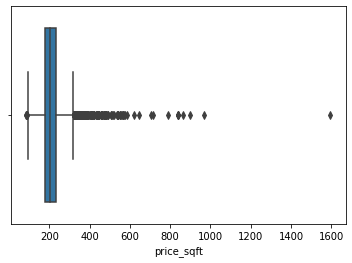

In [1343]:
sb.boxplot(x="price_sqft", data=df);
plt.savefig("/content/drive/MyDrive/ppsf_skewed")

In [1344]:
df["year_built"].value_counts()

2006    245
2007    232
2002    229
2005    225
2004    196
2003    179
2001    176
1999    168
2000    147
1998    139
2008    129
1994    123
1993    120
1996    117
1997    108
1995    104
1987     94
1988     86
1992     84
2014     83
2017     80
2018     79
1991     74
2013     72
2016     65
2009     63
1990     63
1989     61
1985     60
1986     59
2015     56
1980     56
1984     53
1979     50
1978     50
1977     48
2012     44
1982     41
1981     40
1983     39
2010     37
1976     36
1972     32
2019     32
2011     31
1969     30
1963     29
1974     29
1968     28
1973     27
1965     25
1970     25
1966     21
1971     21
1967     18
1959     17
1964     17
1960     17
1961     15
1955     13
1953     13
1975     13
1936     13
1951     12
1958     10
1935     10
1948     10
1962     10
1941      9
1938      9
1954      9
1937      8
1957      8
1949      8
1956      8
1946      8
1947      6
1929      4
1952      4
1922      4
1930      4
1934      4
1940      3
1932

In [1345]:
df["year_built"] = df["year_built"].astype("category")

In [1346]:
def good_years(x):
  gy = [2006, 2007, 2002, 2005, 2004, 2003, 2001, 1999, 2000, 1998, 2008, 1994, 1993, 1996, 1997, 1995, 1987, 1988, 1992, 2014, 2017, 2018, 1991, 2013, 2016, 2009, 1990, 1989, 1985, 1986, 2015, 1980, 1984, 1979, 1978]
  if x in gy:
    pass
  else:
    x = 0
  return x

In [1347]:
df["year_built"] = df["year_built"].apply(good_years)

In [1348]:
df["year_built"].value_counts()

0       942
2006    245
2007    232
2002    229
2005    225
2004    196
2003    179
2001    176
1999    168
2000    147
1998    139
2008    129
1994    123
1993    120
1996    117
1997    108
1995    104
1987     94
1988     86
1992     84
2014     83
2017     80
2018     79
1991     74
2013     72
2016     65
2009     63
1990     63
1989     61
1985     60
1986     59
1980     56
2015     56
1984     53
1978     50
1979     50
Name: year_built, dtype: int64

In [1349]:
df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,HOA_bool,price_sqft
0,15.250595,85646,-111.040707,31.594844,7.443078,9.257510,1997,2,3.0,7.876073,0.0,1697,5,0,0.000000,0,1595.435683
1,15.042648,85750,-110.813768,32.285162,1.437463,9.641733,1995,4,6.0,8.763584,3.0,1710,5,70,4.025352,1,533.372420
2,15.123844,85718,-110.912156,32.343601,2.045109,10.130439,2002,5,7.0,8.563886,3.0,0,1,0,6.045005,1,706.376480
3,14.836709,0,-111.045441,31.562121,4.998428,8.899916,0,5,5.0,8.530702,5.0,0,5,0,0.000000,0,547.960924
4,14.557448,0,-110.736202,31.721347,3.421000,9.369393,1995,6,7.0,8.772610,3.0,1710,4,0,0.000000,0,325.379610


In [1350]:
lot_acres = df["lot_acres"]
df.drop(["lot_acres"], axis=1, inplace=True)
df = pd.get_dummies(df, columns=["year_built", "bedrooms", "bathrooms", "garage", "kitchen_features", "fireplaces", "floor_covering"])
df["lot_acres"] = lot_acres
df.head()

,sold_price,zipcode,longitude,latitude,taxes,sqrt_ft,HOA,HOA_bool,price_sqft,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres
0,15.250595,85646,-111.040707,31.594844,9.257510,7.876073,0.000000,0,1595.435683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.443078
1,15.042648,85750,-110.813768,32.285162,9.641733,8.763584,4.025352,1,533.372420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.437463
2,15.123844,85718,-110.912156,32.343601,10.130439,8.563886,6.045005,1,706.376480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.045109
3,14.836709,0,-111.045441,31.562121,8.899916,8.530702,0.000000,0,547.960924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.998428
4,14.557448,0,-110.736202,31.721347,9.369393,8.772610,0.000000,0,325.379610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.421000


In [1351]:
df.shape

(4867, 132)

In [1352]:
mean_std={}
for var in df[["sold_price", "taxes", "sqrt_ft", "HOA", "price_sqft"]].columns:
    mean_std[var]=(df[var].mean(), df[var].std())
mean_std["lot_acres"] = np.mean(lot_acres), np.std(lot_acres)


In [1353]:
df["lot_acres"] = lot_acres
lot_acres

0       7.443078
1       1.437463
2       2.045109
3       4.998428
4       3.421000
5       1.036737
6       1.467978
7       1.467978
8       0.810930
9       1.467978
10      4.543295
11      1.467978
12      1.486140
13      2.650421
14      0.494696
15      0.139762
16      2.639057
17      6.955764
18      0.936093
19      0.698135
20      0.770108
21      1.439835
22      1.068153
23      1.163151
24      4.998428
25      4.998428
26      0.570980
27      0.815365
28      0.647103
29      0.760806
30      4.099332
31      2.995732
32      3.535090
33      0.737164
34      0.837248
35      0.488580
36      0.765468
37      4.644391
38      5.613238
39      1.519513
40      0.378436
41      1.057790
42      0.797507
43      0.883768
44      1.088562
45      1.837370
46      0.943906
47      1.638997
48      0.620576
49      2.953347
50      0.832909
51      0.774727
52      1.570697
53      0.737164
54      0.277632
55      0.732368
56      0.378436
57      1.549688
58      0.7654

In [1354]:
def reverse_zscore(pandas_series, mean, std):
    x=pandas_series*std+mean
    return x

#for var in df[["sold_price", "lot_acres", "taxes", "sqrt_ft", "HOA", "price_sqft"]].columns:
#    _mean, _std = mean_std[var]
#    df[var] = reverse_zscore(df[var], _mean, _std)

In [1355]:
df["sold_price"] = zscore(df["sold_price"])

In [1356]:
df["sold_price"].iloc[0:5]

0    0.110017
1    0.095313
2    0.101054
3    0.080751
4    0.061004
Name: sold_price, dtype: float64

In [1357]:
df["sold_price"].describe()

count    4.867000e+03
mean    -2.043887e-17
std      1.000103e+00
min     -7.659297e-02
25%     -2.937023e-02
50%     -1.925145e-02
75%     -5.325536e-03
max      6.974259e+01
Name: sold_price, dtype: float64

In [1358]:
df["taxes"] = zscore(df["taxes"])
df["sqrt_ft"] = zscore(df["sqrt_ft"])
df["HOA"] = zscore(df["HOA"])
#df["price_sqft"] = zscore(df["price_sqft"])
df["price_sqft"]

0       1595.435683
1        533.372420
2        706.376480
3        547.960924
4        325.379610
5        377.617576
6        969.305331
7        840.064620
8        468.340202
9        840.064620
10       462.809917
11       840.064620
12       377.595972
13       345.438441
14       516.018061
15       840.064620
16       435.911705
17       863.557858
18       386.322538
19       364.140801
20       356.272267
21       329.264375
22       345.437018
23       412.525783
24       509.613157
25       443.280274
26       470.894581
27       420.000000
28       473.493402
29       354.321187
30       900.450225
31       341.134470
32       787.834372
33       345.038827
34       356.633381
35       646.383394
36       326.674308
37       503.905266
38       483.028721
39       621.019108
40       331.837727
41       319.916613
42       327.838142
43       319.488818
44       382.577987
45       338.091660
46       413.661434
47       275.735294
48       284.965868
49       712.788260


In [1359]:
df["lot_acres"] = lot_acres

In [1360]:
km = KMeans(5, max_iterations=1000)

In [1361]:
df.head()

,sold_price,zipcode,longitude,latitude,taxes,sqrt_ft,HOA,HOA_bool,price_sqft,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres
0,0.110017,85646,-111.040707,31.594844,0.957285,-0.021647,-1.460255,0,1595.435683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.443078
1,0.095313,85750,-110.813768,32.285162,1.594348,0.000438,0.466415,1,533.372420,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.437463
2,0.101054,85718,-110.912156,32.343601,2.404650,-0.004531,1.433090,1,706.376480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.045109
3,0.080751,0,-111.045441,31.562121,0.364375,-0.005357,-1.460255,0,547.960924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.998428
4,0.061004,0,-110.736202,31.721347,1.142794,0.000662,-1.460255,0,325.379610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.421000


In [1362]:
df = df.dropna()

df["zipcode"] = df["zipcode"].astype('category')
df["zipcode"] = df["zipcode"].cat.codes

In [1363]:
df["lot_acres"] = df["lot_acres"] - df["lot_acres"].mean() / df["lot_acres"].std()

In [1364]:
km.fit(df[["zipcode", "longitude", "latitude"]].to_numpy())

In [1365]:
df["kmeans"] = km.predict(df[["zipcode", "longitude", "latitude"]].to_numpy())

In [1366]:
set(df["kmeans"])

{0, 1, 2, 3, 4}

In [1367]:
df["kmeans"]

0       4
1       1
2       2
3       3
4       3
5       0
6       2
7       2
8       2
9       2
10      1
11      2
12      2
13      2
14      1
15      2
16      0
17      3
18      1
19      2
20      1
21      2
22      2
23      1
24      3
25      3
26      0
27      2
28      0
29      1
30      3
31      1
32      2
33      2
34      2
35      0
36      1
37      0
38      3
39      0
40      0
41      2
42      2
43      2
44      0
45      2
46      2
47      0
48      2
49      1
50      1
51      0
52      2
53      2
54      1
55      2
56      0
57      1
58      2
59      0
60      0
61      1
62      0
63      0
64      0
65      0
66      3
67      1
68      2
69      0
70      1
71      1
72      1
73      0
74      1
75      1
76      1
77      0
78      2
79      1
80      1
81      0
82      0
83      0
84      0
85      2
86      0
87      2
88      0
89      0
90      2
91      0
92      2
93      0
94      0
95      2
96      2
97      2
98      0
99      2


In [1368]:

#location = df[["latitude", "longitude"]].to_numpy()
#location 

#colormap = cm.LinearColormap(colors=['#000000', '#555555', '#999999', '#FFFFFF', '#FFFF00'], index=[0,1,2,3,4])
#print(location.shape)
#k = df["kmeans"].to_numpy()
#print(k.shape)
#my_map=folium.Map(location = [np.mean(location[:,0]), np.mean(location[:,1])], zoom_start = 9, min_zoom = 1)

#for point in range(0, len(df)):
#    folium.Circle(location[point], radius=0.25, color=colormap(k[point])).add_to(my_map)

#my_map.save("cluster_map.html")

#my_map

In [1369]:
 means = df.groupby('kmeans')['price_sqft'].mean()
 means

kmeans
0    241.294836
1    206.574073
2    212.502176
3    206.510529
4    192.773621
Name: price_sqft, dtype: float64

In [1370]:
def deal(x):
  return means[x]

In [1371]:
df["longitude"] = zscore(df["longitude"])
df["latitude"] = zscore(df["latitude"])
mean_std["longitude"]=(df["longitude"].mean(), df["longitude"].std())
mean_std["latitude"]=(df["latitude"].mean(), df["latitude"].std())
df = pd.get_dummies(df, columns=["zipcode"])

In [1372]:
df.tail()

,sold_price,longitude,latitude,taxes,sqrt_ft,HOA,HOA_bool,price_sqft,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
4861,-0.035688,-0.083379,0.030973,-0.476513,-0.027197,1.073301,1,254.036087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1.084177,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4862,-0.041183,2.074374,-2.341212,-1.774606,-0.013854,-1.460255,0,137.461816,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.538729,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4863,-0.033733,0.444623,0.024469,-0.329957,-0.024812,0.350987,1,237.273512,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.365924,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4864,-0.033733,-1.187158,-0.088482,-0.017286,-0.013018,-1.460255,0,147.690655,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.551557,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4865,-0.047922,-0.006857,-5.368323,-1.222431,-0.009342,-1.460255,0,104.239055,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.391245,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [1373]:
df.shape

(4856, 151)

In [1374]:
price_sqft = df[["price_sqft"]]
df.drop(["price_sqft"], axis=1, inplace=True)

In [1375]:
df["split"] = np.random.uniform(0.00, 1.00, len(df))
df.iloc[-1:,:]["split"] = 1.00
print(df.iloc[-1:,:])

      sold_price  longitude  latitude     taxes   sqrt_ft       HOA  HOA_bool  \
4865   -0.047922  -0.006857 -5.368323 -1.222431 -0.009342 -1.460255         0   

      year_built_0  year_built_1978  year_built_1979  year_built_1980  \
4865             0                0                0                0   

      year_built_1984  year_built_1985  year_built_1986  year_built_1987  \
4865                0                0                0                0   

      year_built_1988  year_built_1989  year_built_1990  year_built_1991  \
4865                1                0                0                0   

      year_built_1992  year_built_1993  year_built_1994  year_built_1995  \
4865                0                0                0                0   

      year_built_1996  year_built_1997  year_built_1998  year_built_1999  \
4865                0                0                0                0   

      year_built_2000  year_built_2001  year_built_2002  year_built_2003  \
48

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1376]:
test = df[df["split"] >= 0.9].reset_index(drop=True)
df = df[df["split"] < 0.9].reset_index(drop=True)

In [1377]:
print(df.shape, test.shape)

(4394, 151) (462, 151)


In [1378]:
#K Fold
df.drop(["split"], axis=1, inplace=True)
test.drop(["split"], axis=1, inplace=True)

df["fold"] = np.random.randint(0,5,len(df))

In [1379]:
test["kmeans"]

0      2
1      2
2      1
3      0
4      0
5      0
6      0
7      0
8      2
9      0
10     2
11     2
12     1
13     0
14     0
15     1
16     2
17     0
18     0
19     2
20     0
21     0
22     1
23     0
24     1
25     2
26     1
27     1
28     1
29     2
30     1
31     0
32     2
33     1
34     2
35     0
36     1
37     2
38     1
39     2
40     1
41     2
42     4
43     2
44     1
45     2
46     2
47     2
48     2
49     1
50     2
51     2
52     0
53     1
54     2
55     2
56     2
57     2
58     1
59     1
60     2
61     1
62     2
63     0
64     1
65     1
66     0
67     2
68     2
69     3
70     0
71     2
72     1
73     0
74     1
75     1
76     1
77     1
78     1
79     2
80     0
81     0
82     1
83     1
84     2
85     2
86     2
87     2
88     2
89     1
90     2
91     2
92     1
93     2
94     2
95     1
96     2
97     2
98     1
99     1
100    2
101    3
102    2
103    2
104    0
105    1
106    2
107    1
108    1
109    1
110    1
1

In [1380]:
df["fold"].describe()

count    4394.000000
mean        1.988848
std         1.427388
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: fold, dtype: float64

In [1381]:
def split(data, fold_num):
    fold = fold_num
    X_train = df[df["fold"] != fold].reset_index(drop=True)
    X_test = df[df["fold"] == fold].reset_index(drop=True)
    y_train = X_train["sold_price"]
    y_test = X_test["sold_price"]

    X_train.drop(["sold_price"], axis=1, inplace=True)
    X_test.drop(["sold_price"], axis=1, inplace=True)


    X_train.drop(["fold"], axis=1, inplace=True)
    X_test.drop(["fold"], axis=1, inplace=True)

    return (X_train, y_train, X_test, y_test)
X_train, y_train, X_test, y_test = split(df, 0)

In [1382]:
X_train.head()

,longitude,latitude,taxes,sqrt_ft,HOA,HOA_bool,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
0,0.815661,-0.156298,1.594348,0.000438,0.466415,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.187771,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000583,0.182167,2.404650,-0.004531,1.433090,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.795417,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-1.103594,-4.343980,0.364375,-0.005357,-1.460255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.748736,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.140012,0.989898,-0.205305,-0.001884,0.934804,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.212955,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.240033,1.132583,1.857798,-0.017621,-1.460255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.218287,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1383]:
X_train["kmeans"]

0       1
1       2
2       3
3       0
4       2
5       2
6       1
7       2
8       2
9       2
10      1
11      2
12      0
13      3
14      1
15      2
16      1
17      2
18      2
19      1
20      3
21      3
22      0
23      2
24      0
25      1
26      3
27      1
28      2
29      2
30      0
31      1
32      0
33      3
34      0
35      0
36      2
37      0
38      2
39      2
40      0
41      2
42      1
43      2
44      2
45      1
46      2
47      0
48      1
49      2
50      0
51      1
52      0
53      0
54      0
55      3
56      1
57      2
58      0
59      1
60      1
61      0
62      1
63      1
64      0
65      1
66      1
67      0
68      0
69      0
70      0
71      2
72      0
73      2
74      0
75      0
76      2
77      0
78      2
79      0
80      2
81      0
82      2
83      0
84      2
85      3
86      1
87      0
88      1
89      0
90      0
91      0
92      1
93      0
94      1
95      2
96      2
97      2
98      2
99      2


In [1384]:
y_train.head()

0    0.095313
1    0.101054
2    0.080751
3    0.064293
4    0.076106
Name: sold_price, dtype: float64

In [1385]:
knn = KNNRegressor()
knn.fit(X_train.to_numpy(), y_train.to_numpy())

In [1386]:
y_hat = knn.predict(X_test.to_numpy(), K=20)

In [1387]:
y_hat = np.nan_to_num(y_hat)

In [1388]:
def grid_search(X_train, y_train, X_test, y_test, hp_array, model):
  best_score = 0
  best_y_hat = y_test
  best_hyp = 0
  for i in range(len(hp_array)):
    model.fit(X_train, y_train)
    y_hat = model.predict(X_test, K=hp_array[i])
    y_hat = np.nan_to_num(y_hat)
    r = r2(y_test, y_hat)
    if r > best_score:
      best_score = r
      best_y_hat = y_hat
      best_hyp = hp_array[i]
  return (best_score, best_y_hat, best_hyp)

In [1389]:
#score, y_hat, hyp = grid_search(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), [128, 129, 130, 131, 132, 133], knn)
#print(score, hyp)

In [1390]:
def scorer(data, folds, model):
    X_train, y_train, X_test, y_test = split(data, folds)
    score, y_hat, hyp = grid_search(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), [120, 125, 130, 135], knn)
    print(score, hyp)   
    return y_hat

In [1391]:
#y_hat0 = scorer(df, 0, knn)
#y_hat1 = scorer(df, 1, knn)
#y_hat2 = scorer(df, 2, knn)
#y_hat3 = scorer(df, 3, knn)
#y_hat4 = scorer(df, 4, knn)

In [1392]:
test.head()


,sold_price,longitude,latitude,taxes,sqrt_ft,HOA,HOA_bool,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
0,0.076106,0.240141,1.140350,1.813396,-0.017621,-1.460255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.218287,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.057377,-0.006318,0.167612,2.573331,-0.000192,1.434223,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.191901,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0.046062,1.260704,-0.424104,0.629691,-0.024103,-1.460255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.703655,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.041775,-1.472545,0.896140,-0.230230,-0.013689,0.827196,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.748916,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.039530,-1.443533,0.899332,1.441390,-0.009984,0.869512,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.713198,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1393]:
test_y = test["sold_price"]
test.drop(["sold_price"], axis=1, inplace=True)
y_df = df["sold_price"]
X_df = df.drop(["sold_price"], axis=1)
X_df.drop(["fold"], axis=1, inplace=True)
print(test.shape, X_df.shape)
test.head()
knn.fit(X_df.to_numpy(), y_df.to_numpy())

y_hat = knn.predict(test.to_numpy(), K=120)
y_hat = np.nan_to_num(y_hat)
print(test_y.shape, y_hat.shape)
r2(test_y.to_numpy(), y_hat)

(462, 149) (4394, 149)
(462,) (462,)


0.5742861387908007

In [1394]:
y_hl = pd.DataFrame({"sold_price": y_hat})
_mean, _std = mean_std["sold_price"]
y_hl["sold_price"] = reverse_zscore(y_hl["sold_price"], _mean, _std)
y_hl["sold_price"] = np.expm1(y_hl["sold_price"])

print(y_hl.iloc[-1:,:]["sold_price"])

_mean, _std = mean_std["sqrt_ft"]
test["sqrt_ft"] = reverse_zscore(test["sqrt_ft"], _mean, _std)
test["sqrt_ft"] = np.expm1(test["sqrt_ft"])


test["price_sqft"] = y_hl["sold_price"] / test["sqrt_ft"]
test["price_sqft"]




461    783848.446906
Name: sold_price, dtype: float64


0      839.713148
1      239.406747
2      324.079040
3      349.932492
4      276.987676
5      454.808642
6      540.084955
7      293.521225
8      241.079092
9      237.994350
10     197.915507
11     175.548118
12     194.786561
13     230.998885
14     292.567644
15     218.893101
16     197.167017
17     199.592062
18     305.775248
19     195.448921
20     340.113889
21     249.074308
22     268.905791
23     607.377549
24     189.514904
25     154.773819
26     131.143555
27     168.135203
28     198.903240
29     152.208175
30     203.837562
31     293.752550
32     200.916089
33     168.481254
34     264.629471
35     253.099663
36     195.097264
37     141.298154
38     254.448080
39     248.871771
40     165.590148
41     227.043283
42     220.921252
43     215.520576
44     283.386033
45     209.263745
46     248.781332
47     131.351169
48     173.647957
49     172.497428
50     169.831385
51     225.741596
52     246.309470
53     214.035527
54     157.122396
55     175

In [1395]:
means

kmeans
0    241.294836
1    206.574073
2    212.502176
3    206.510529
4    192.773621
Name: price_sqft, dtype: float64

In [1396]:
test["avg"] = test["kmeans"].apply(deal)

In [1397]:
test["result"] = test[["avg", "price_sqft"]].mask(test["avg"] > test["price_sqft"], True).iloc[:,0]


In [1398]:
def ineq(x):
  if x > True:
    return False
  else: 
    return x

In [1399]:
test["result"] = test["result"].apply(ineq)
test["result"]

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10      True
11      True
12      True
13      True
14     False
15     False
16      True
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31     False
32      True
33      True
34     False
35     False
36      True
37      True
38     False
39     False
40      True
41     False
42     False
43     False
44     False
45      True
46     False
47      True
48      True
49      True
50      True
51     False
52     False
53     False
54      True
55      True
56     False
57     False
58      True
59      True
60      True
61     False
62      True
63     False
64     False
65      True
66      True
67     False
68      True
69      True
70     False
71     False
72      True
73      True
74     False
75      True
76     False

In [1400]:
lr = OurLinearRegression()

In [1401]:
X_train, y_train, X_test, y_test = split(df, 0)

In [1402]:
X_train.head()

,longitude,latitude,taxes,sqrt_ft,HOA,HOA_bool,year_built_0,year_built_1978,year_built_1979,year_built_1980,year_built_1984,year_built_1985,year_built_1986,year_built_1987,year_built_1988,year_built_1989,year_built_1990,year_built_1991,year_built_1992,year_built_1993,year_built_1994,year_built_1995,year_built_1996,year_built_1997,year_built_1998,year_built_1999,year_built_2000,year_built_2001,year_built_2002,year_built_2003,year_built_2004,year_built_2005,year_built_2006,year_built_2007,year_built_2008,year_built_2009,year_built_2013,year_built_2014,year_built_2015,year_built_2016,year_built_2017,year_built_2018,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_10,bedrooms_11,bedrooms_18,bathrooms_0.0,bathrooms_1.0,bathrooms_2.0,bathrooms_2.5,bathrooms_3.0,bathrooms_3.5,bathrooms_4.0,bathrooms_4.5,bathrooms_5.0,bathrooms_6.0,bathrooms_7.0,bathrooms_8.0,bathrooms_9.0,bathrooms_11.0,bathrooms_14.0,garage_0.0,garage_1.0,garage_2.0,garage_2.5,garage_3.0,garage_3.5,garage_4.0,garage_4.5,garage_5.0,garage_6.0,garage_7.0,garage_8.0,garage_9.0,garage_10.0,garage_11.0,garage_12.0,garage_13.0,garage_20.0,garage_22.0,garage_30.0,kitchen_features_0,kitchen_features_153,kitchen_features_1383,kitchen_features_1679,kitchen_features_1681,kitchen_features_1697,kitchen_features_1709,kitchen_features_1710,kitchen_features_1715,kitchen_features_1759,kitchen_features_1767,kitchen_features_1770,kitchen_features_1813,fireplaces_0,fireplaces_1,fireplaces_2,fireplaces_3,fireplaces_4,fireplaces_5,fireplaces_6,fireplaces_7,floor_covering_0,floor_covering_1,floor_covering_2,floor_covering_23,floor_covering_30,floor_covering_35,floor_covering_64,floor_covering_70,floor_covering_100,floor_covering_107,floor_covering_113,floor_covering_121,floor_covering_125,floor_covering_156,floor_covering_206,floor_covering_208,floor_covering_227,floor_covering_240,floor_covering_255,lot_acres,kmeans,zipcode_0,zipcode_1,zipcode_2,zipcode_3,zipcode_4,zipcode_5,zipcode_6,zipcode_7,zipcode_8,zipcode_9,zipcode_10,zipcode_11,zipcode_12,zipcode_13,zipcode_14,zipcode_15,zipcode_16,zipcode_17,zipcode_18
0,0.815661,-0.156298,1.594348,0.000438,0.466415,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.187771,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.000583,0.182167,2.404650,-0.004531,1.433090,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.795417,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,-1.103594,-4.343980,0.364375,-0.005357,-1.460255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.748736,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.140012,0.989898,-0.205305,-0.001884,0.934804,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.212955,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.240033,1.132583,1.857798,-0.017621,-1.460255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.218287,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1403]:
print(X_train.shape, y_train.shape)
lr.fit(X_train.to_numpy(), y_train.to_numpy())

(3496, 149) (3496,)


In [1404]:
y_hat = lr.predict(X_test)

In [1405]:
def grid_search(X_train, y_train, X_test, y_test, hp_array1, hp_array2, model):
  best_score = 0
  best_y_hat = y_test
  best_hyp = 0
  for i in range(len(hp_array1)):
    for j in range(len(hp_array2)):
        model.fit(X_train, y_train, lambd=hp_array1[i], p=hp_array2[j])
        y_hat = model.predict(X_test)
        y_hat = np.nan_to_num(y_hat)
        r = r2(y_test, y_hat)
        if r > best_score:
          best_score = r
          best_y_hat = y_hat
          best_hyp1 = hp_array1[i]
          best_hyp2 = hp_array2[j]
  return (best_score, best_y_hat, best_hyp1, best_hyp2)

In [1406]:
#grid_search(X_train, y_train, X_test, y_test, [5, 6, 7, 8], [5, 6, 7, 8], lr)